<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/%23Task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
model = keras.models.load_model('/content/model1.h5')
model2 = keras.models.load_model('/content/model2.h5')
model3 = keras.models.load_model('/content/model3.h5')
model4 = keras.models.load_model('/content/model4.h5')

# **Нейронные сети с различным числом нейронов на скрытом слое [30; 1'500; 5'000; 10'000]**



Коэфициент корреляции Пирсона (линейный коэфициент корреляции)

In [ ]:
weight_origin2=model.layers[2].kernel
print(weight_origin2.shape)

(784, 30)


(30, 784)
(1500, 784)
(5000, 784)
(10000, 784)


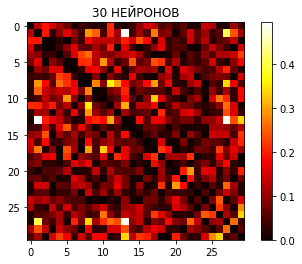

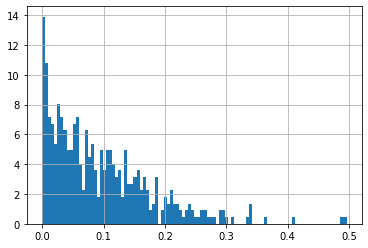

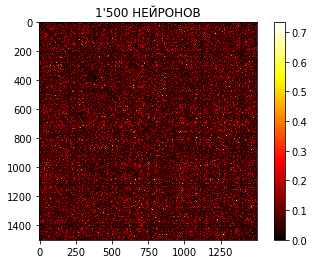

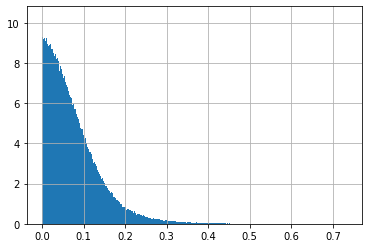

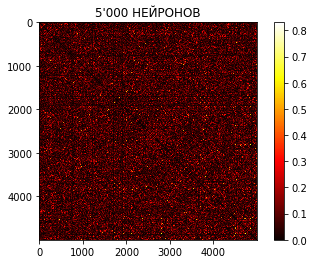

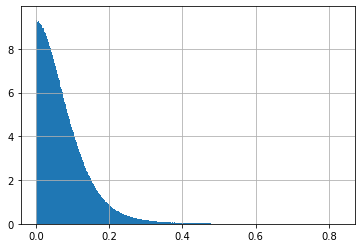

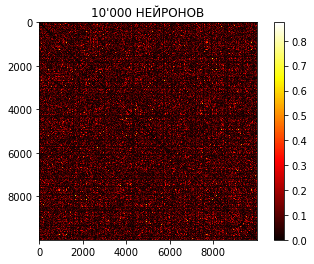

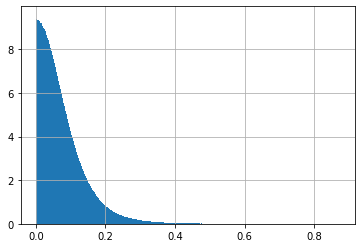

In [3]:
for i in range(4):
  if i==0:
    #weight_origin2=model.layers[0].get_weights()[0].transpose() #ВЫХОД скрытого
    weight_origin2 = np.transpose(model.layers[2].kernel)
    plt.figure()
    plt.title("30 НЕЙРОНОВ")
    #net1 = np.zeros(y) 
    T0 = 0.25
    bins=100
  if i==1: 
    #weight_origin2=model2.layers[0].get_weights()[0].transpose() #ВЫХОД скрытого
    weight_origin2 = np.transpose(model2.layers[2].kernel)
    plt.figure()
    plt.title("1'500 НЕЙРОНОВ")
    #net2 = np.zeros(y) 
    bins=1000
  if i==2: 
    #weight_origin2=model3.layers[0].get_weights()[0].transpose() #ВЫХОД скрытого
    weight_origin2 = np.transpose(model3.layers[2].kernel)
    plt.figure()
    plt.title("5'000 НЕЙРОНОВ")
    #net3 = np.zeros(y) 
    bins=1000
  if i==3: 
    #weight_origin2=model4.layers[0].get_weights()[0].transpose() #ВЫХОД скрытого
    weight_origin2 = np.transpose(model4.layers[2].kernel)
    plt.figure()
    plt.title("10'000 НЕЙРОНОВ")
    #net4 = np.zeros(y) 
    bins=1000
  
  (y,z) = weight_origin2.shape
  print(weight_origin2.shape)
  m = np.zeros((y,y))
  m = abs(np.corrcoef(weight_origin2))
  for j in range(y):
    m[j][j]=0

  plt.imshow(m, cmap='hot', interpolation='nearest')
  plt.colorbar()

  plt.figure()
  a = m.flatten()
  plt.hist(a,bins,density=True)
  plt.grid(True)


# #TASK 9

In [9]:
for i in range(4):
  if i==0:
    print('30 НЕЙРОНОВ:')
    weight_origin2 = np.transpose(model.layers[2].kernel)
  if i==1: 
    print('1500 НЕЙРОНОВ:')
    weight_origin2 = np.transpose(model2.layers[2].kernel)
  if i==2: 
    print('5000 НЕЙРОНОВ:')
    weight_origin2 = np.transpose(model3.layers[2].kernel)
  if i==3: 
    print('10000 НЕЙРОНОВ:')
    weight_origin2 = np.transpose(model4.layers[2].kernel)
  
  (y,z) = weight_origin2.shape
  print(weight_origin2.shape)
  am = np.zeros((y,y))
  am = abs(np.corrcoef(weight_origin2))
  np.fill_diagonal(am,0)
  mask = am > 0.5

  similar = {}
  for idx, k in enumerate(mask):
    nk = k.nonzero()[0]
    if len(nk) != 0:
      similar[idx] = nk[np.argmax(am[idx,nk])]
  
  print("> 0.5")
  print(len(similar))

  mask = am > 0.7

  similar = {}
  for idx, k in enumerate(mask):
    nk = k.nonzero()[0]
    if len(nk) != 0:
      similar[idx] = nk[np.argmax(am[idx,nk])]
  
  print("> 0.7")
  print(len(similar))

30 НЕЙРОНОВ:
(30, 784)
> 0.5
0
> 0.7
0
1500 НЕЙРОНОВ:
(1500, 784)
> 0.5
413
> 0.7
2
5000 НЕЙРОНОВ:
(5000, 784)
> 0.5
2962
> 0.7
177
10000 НЕЙРОНОВ:
(10000, 784)
> 0.5
6422
> 0.7
742
